## E-Commerce Sales Dataset
Analyzing and Maximizing Online Business Performance

 



#### Load dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### load datas

In [ ]:
amazon_sale = pd.read_csv('/content/drive/MyDrive/E commerce/e commerce/Amazon Sale Report.csv',parse_dates = ['Date'],index_col= 'index')


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### viewing dataframes

In [ ]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 40)
pd.set_option('display.width', 1000)

In [ ]:
amazon_sale.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
index,,,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
amazon_sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128975 non-null  object        
 1   Date                128975 non-null  datetime64[ns]
 2   Status              128975 non-null  object        
 3   Fulfilment          128975 non-null  object        
 4   Sales Channel       128975 non-null  object        
 5   ship-service-level  128975 non-null  object        
 6   Style               128975 non-null  object        
 7   SKU                 128975 non-null  object        
 8   Category            128975 non-null  object        
 9   Size                128975 non-null  object        
 10  ASIN                128975 non-null  object        
 11  Courier Status      122103 non-null  object        
 12  Qty                 128975 non-null  int64         
 13  currency            121180 no

In [ ]:
for col in amazon_sale.columns :
  print(f'the number of missing values in {col} :{ amazon_sale[col].isnull().sum()}')

the number of missing values in Order ID :0
the number of missing values in Date :0
the number of missing values in Status :0
the number of missing values in Fulfilment :0
the number of missing values in Sales Channel  :0
the number of missing values in ship-service-level :0
the number of missing values in Style :0
the number of missing values in SKU :0
the number of missing values in Category :0
the number of missing values in Size :0
the number of missing values in ASIN :0
the number of missing values in Courier Status :6872
the number of missing values in Qty :0
the number of missing values in currency :7795
the number of missing values in Amount :7795
the number of missing values in ship-city :33
the number of missing values in ship-state :33
the number of missing values in ship-postal-code :33
the number of missing values in ship-country :33
the number of missing values in promotion-ids :49153
the number of missing values in B2B :0
the number of missing values in fulfilled-by :896

In [ ]:
# check for unique values
for col in amazon_sale.columns :
  print(f'the unique values in {col} :{ amazon_sale[col].unique()}')
  print('--------------------------------------------------------------------------')

the unique values in Order ID :['405-8078784-5731545' '171-9198151-1101146' '404-0687676-7273146' ...
 '407-9547469-3152358' '402-6184140-0545956' '408-7436540-8728312']
--------------------------------------------------------------------------
the unique values in Date :['2022-04-30T00:00:00.000000000' '2022-04-29T00:00:00.000000000'
 '2022-04-28T00:00:00.000000000' '2022-04-27T00:00:00.000000000'
 '2022-04-26T00:00:00.000000000' '2022-04-25T00:00:00.000000000'
 '2022-04-24T00:00:00.000000000' '2022-04-23T00:00:00.000000000'
 '2022-04-22T00:00:00.000000000' '2022-04-21T00:00:00.000000000'
 '2022-04-20T00:00:00.000000000' '2022-04-19T00:00:00.000000000'
 '2022-04-18T00:00:00.000000000' '2022-04-17T00:00:00.000000000'
 '2022-04-16T00:00:00.000000000' '2022-04-15T00:00:00.000000000'
 '2022-04-14T00:00:00.000000000' '2022-04-13T00:00:00.000000000'
 '2022-04-12T00:00:00.000000000' '2022-04-11T00:00:00.000000000'
 '2022-04-10T00:00:00.000000000' '2022-04-09T00:00:00.000000000'
 '2022-04-08T

In [ ]:
# dropping fulfilled-by,unnamed,currency, ship-in-country columns because they give nothing to the datsets since it is jxt one information,they show
amazon_sale.drop(['fulfilled-by','Unnamed: 22','ship-country','currency'],axis = 1,inplace = True)

In [ ]:
# checking for duplicates
amazon_sale.duplicated().value_counts()

False    128969
True          6
dtype: int64

In [ ]:
amazon_sale.drop_duplicates(inplace = True)

In [ ]:
amazon_sale.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'promotion-ids', 'B2B'], dtype='object')

#### handling missing values

In [ ]:
## courier status
amazon_sale['Courier Status'].fillna('unknown',inplace = True)

In [ ]:
## amount
amazon_sale['Amount'].fillna(0,inplace = True)

In [ ]:
amazon_sale['ship-city'].fillna('unknown',inplace = True)
amazon_sale['ship-state'].fillna('unknown',inplace = True)
amazon_sale['ship-postal-code'].fillna(amazon_sale['ship-postal-code'].mode()[0],
                                       inplace = True)

In [ ]:
amazon_sale['promotion-ids'].fillna('unknown',inplace = True)

In [ ]:
amazon_sale.isnull().sum()

Order ID            0
Date                0
Status              0
Fulfilment          0
Sales Channel       0
                   ..
ship-city           0
ship-state          0
ship-postal-code    0
promotion-ids       0
B2B                 0
Length: 19, dtype: int64

#### EDA on Sale report

In [ ]:
amazon_sale.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'promotion-ids', 'B2B'], dtype='object')

In [ ]:
amazon_sale['month'] = amazon_sale['Date'].dt.month
month = ['march','april','may','june']
amazon_sale['month'].replace([3,4,5,6],month,inplace =True)

In [ ]:
amazon_sale['day'] = amazon_sale['Date'].dt.dayofweek

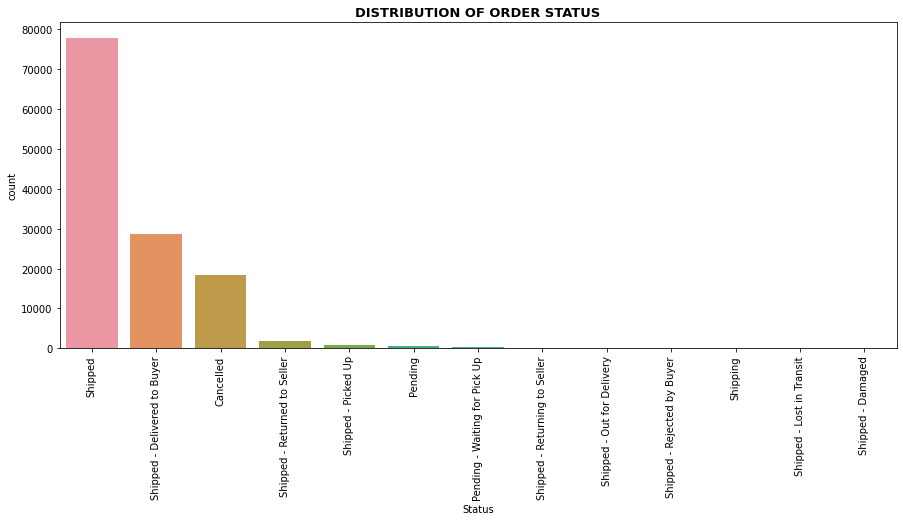

In [ ]:
# distribution of order status
plt.figure(figsize = (15,6))
sns.countplot(x='Status',data = amazon_sale,order = amazon_sale['Status'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('DISTRIBUTION OF ORDER STATUS',fontweight = 'bold',fontsize = 13);

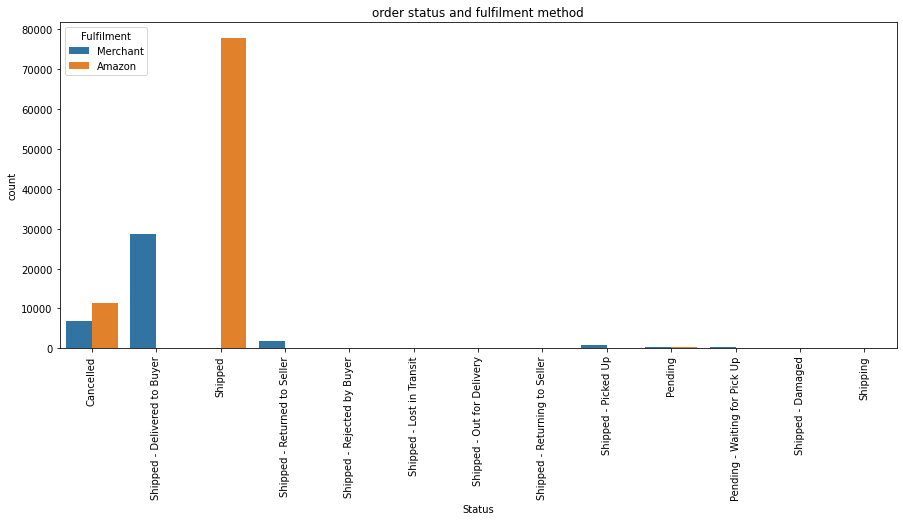

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'Status',hue = 'Fulfilment',data = amazon_sale)
plt.xticks(rotation = 90)
plt.title('order status and fulfilment method');

**observation :**
* most of shipment done by merchant have been delivered to the buyers 

In [ ]:
amazon_sale


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B,month,day
index,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,unknown,False,4,5
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False,4,5
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True,4,5
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,unknown,False,4,5
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,unknown,False,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,unknown,False,4,1
128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,4,1
128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049.0,unknown,False,4,1


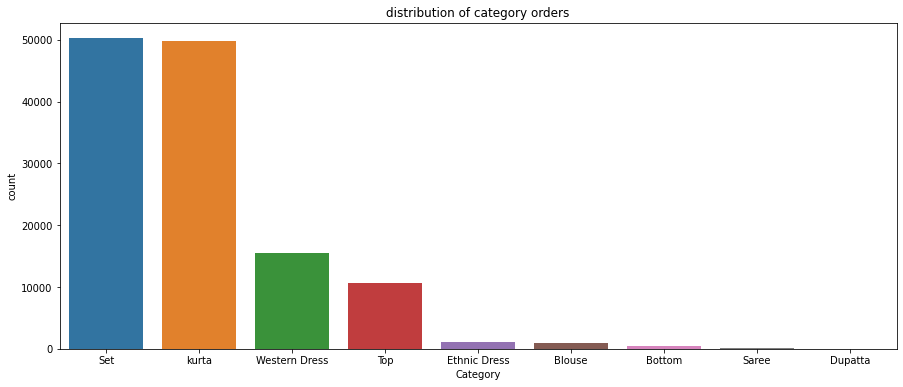

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'Category',data = amazon_sale,order = amazon_sale['Category'].value_counts().index)
plt.title('distribution of category orders');

**observation :**
* set and kurta has the highest distribution of sales of 50000 orders
* Bottom , Saree and has the least sales distribution highly below 10000

In [ ]:
def category_count(df) :
  plt.figure(figsize = (15,6))
  sns.countplot(x='Category',data  = df,order = amazon_sale['Category'].value_counts().index)

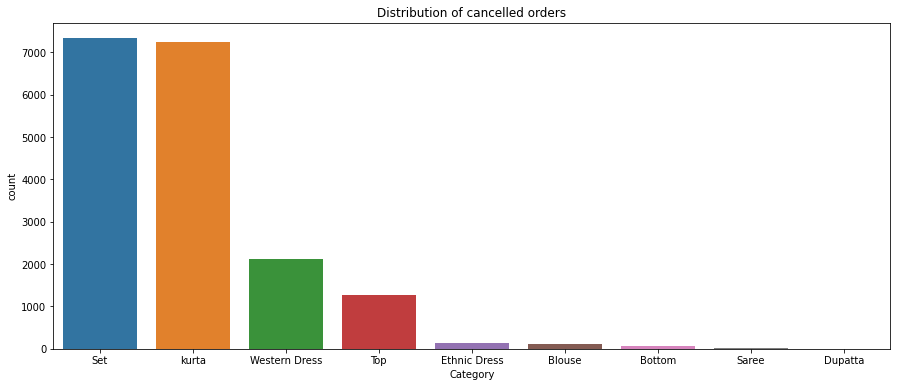

In [ ]:
cancelled = amazon_sale[amazon_sale['Status'] == 'Cancelled']
category_count(cancelled)
plt.title('Distribution of cancelled orders');

** Observation : **
* over 7000units of set and kurta were cancelled from the 70000 units ordered
* saree and bottom has a very small cancelled order which is understandable due to the low total volume of order

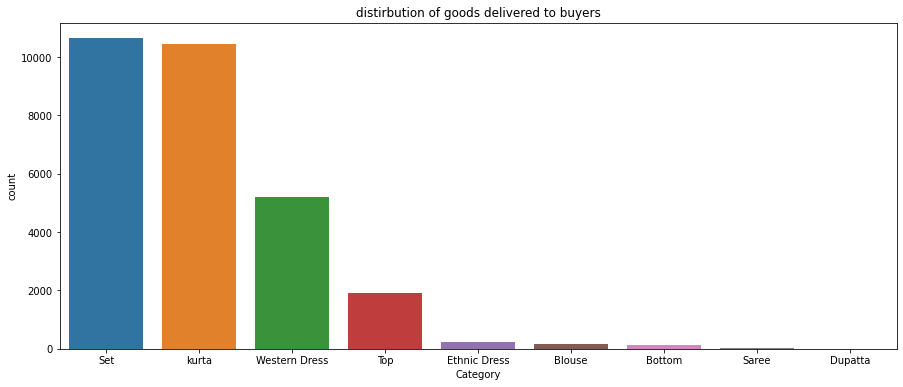

In [ ]:
Delivered= amazon_sale[amazon_sale['Status'] == 'Shipped - Delivered to Buyer']
category_count(Delivered)
plt.title('distirbution of goods delivered to buyers');

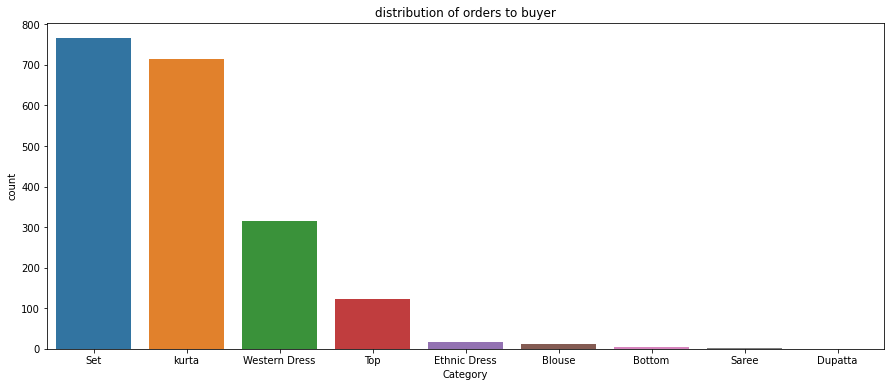

In [ ]:
Returned = amazon_sale[amazon_sale['Status'] == 'Shipped - Returned to Seller']
category_count(Returned)
plt.title('distribution of orders to buyer');


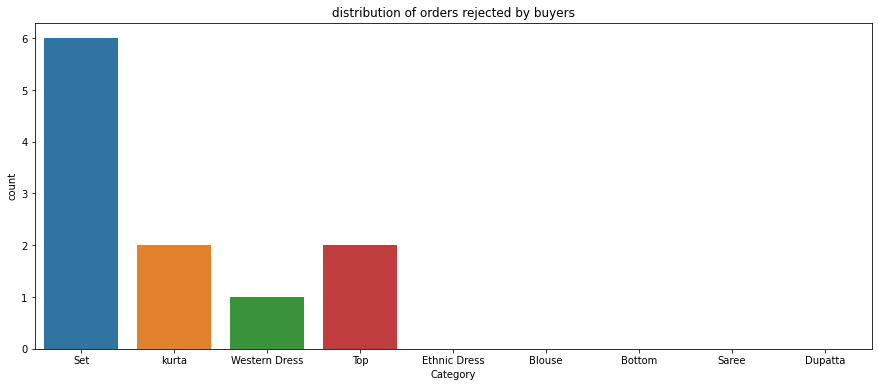

In [ ]:
rejected = amazon_sale[amazon_sale['Status'] == 'Shipped - Rejected by Buyer']
category_count(rejected)
plt.title('distribution of orders rejected by buyers');

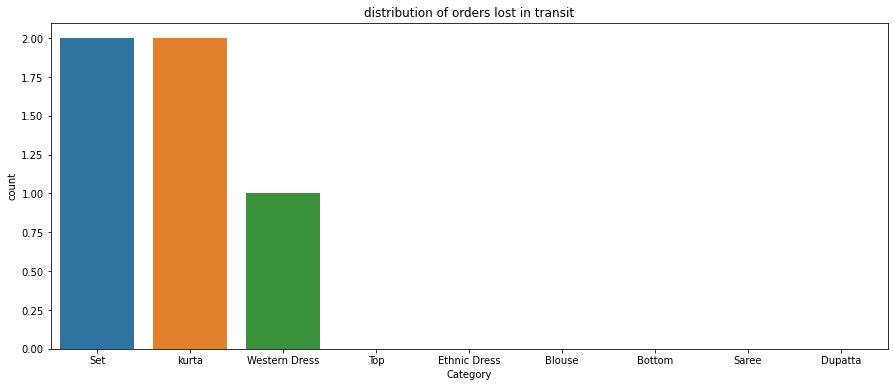

In [ ]:
lost_transit = amazon_sale[amazon_sale['Status'] == 'Shipped - Lost in Transit']
category_count(lost_transit)
plt.title('distribution of orders lost in transit');

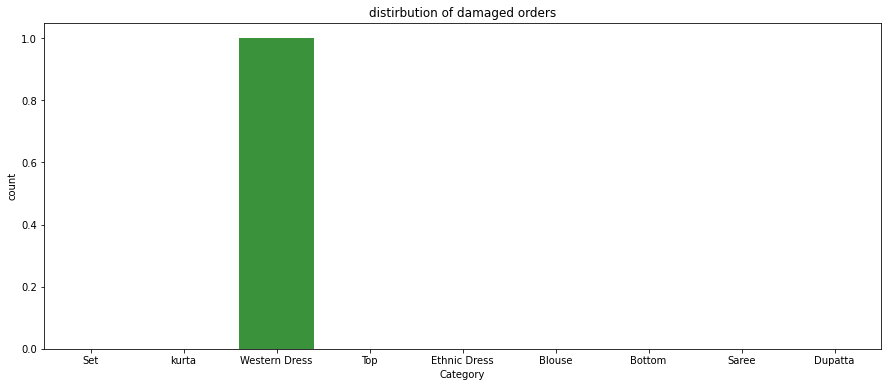

In [ ]:
damaged = amazon_sale[amazon_sale['Status'] == 'Shipped - Damaged']
category_count(damaged)
plt.title('distirbution of damaged orders');

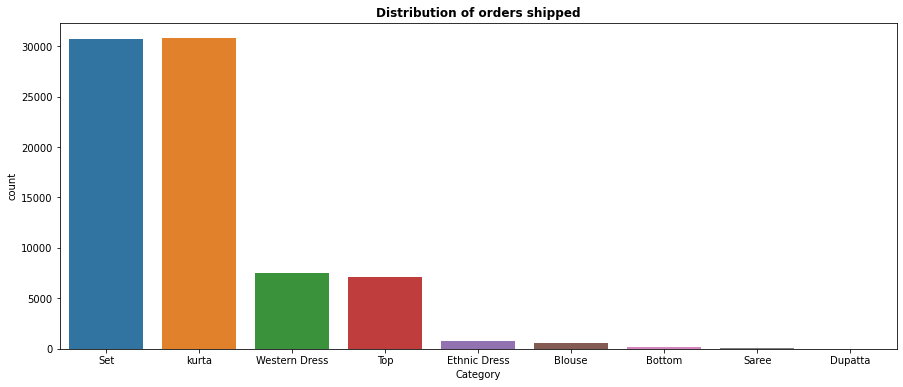

In [ ]:
shipped = amazon_sale[amazon_sale['Status'] == 'Shipped']
category_count(shipped)
plt.title('Distribution of orders shipped',fontweight  = 'bold');

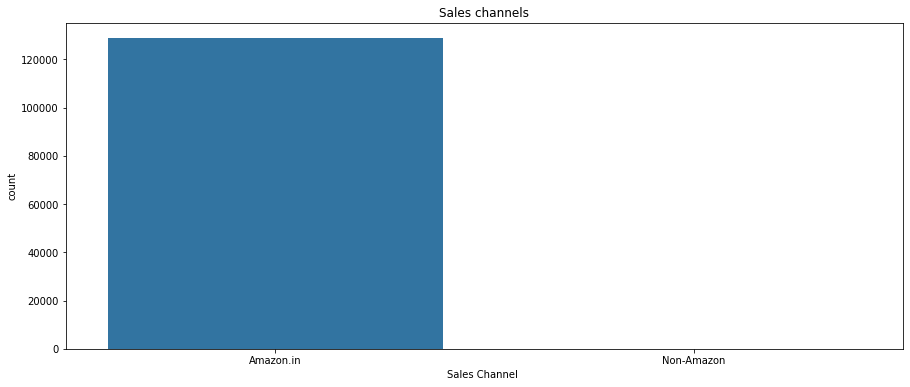

In [ ]:
# distribution of sales channel
plt.figure(figsize = (15,6))
sns.countplot(x = 'Sales Channel ',data=amazon_sale)
plt.title('Sales channels');

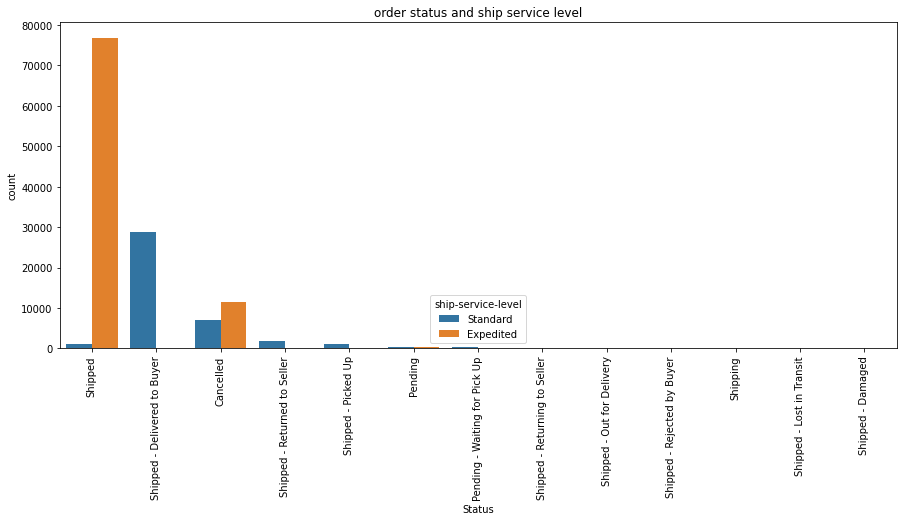

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'Status',hue = 'ship-service-level',data = amazon_sale, order = amazon_sale['Status'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('order status and ship service level');

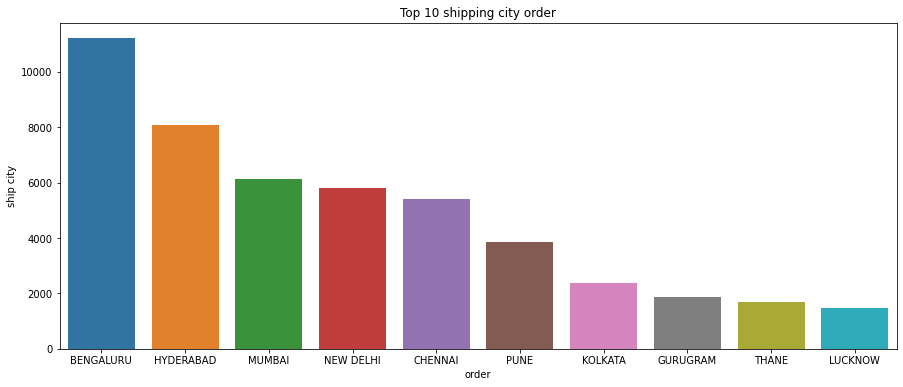

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x = amazon_sale['ship-city'].value_counts()[:10].index, y = amazon_sale['ship-city'].value_counts()[:10])
plt.xlabel('order')
plt.ylabel('ship city')
plt.title('Top 10 shipping city order');

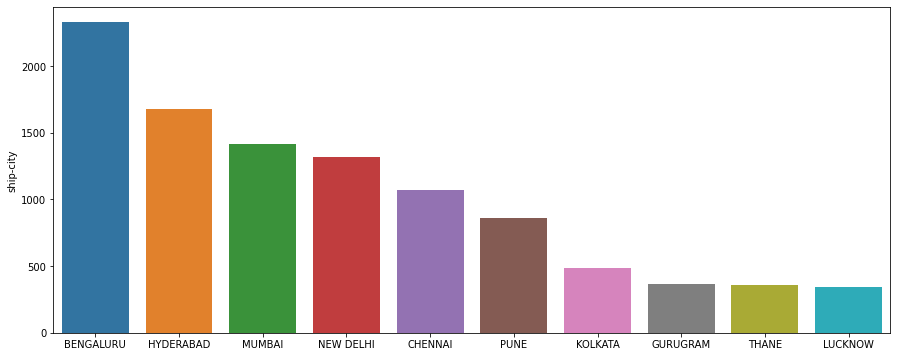

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x = Delivered['ship-city'].value_counts()[:10].index, y = Delivered['ship-city'].value_counts()[:10])

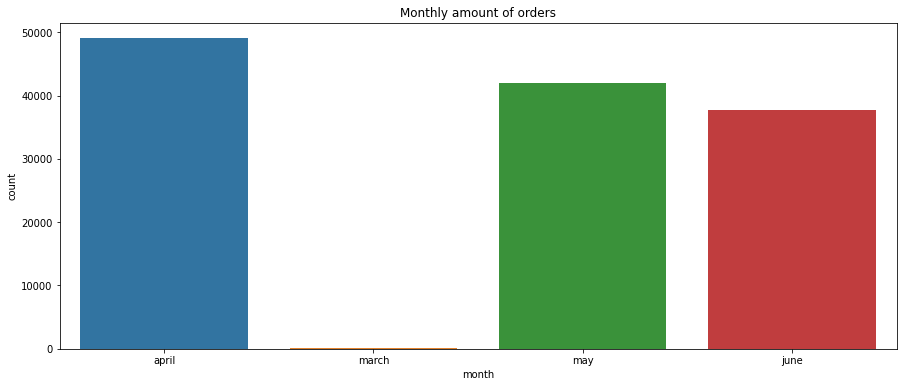

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'month',data = amazon_sale)
plt.title('Monthly amount of orders');

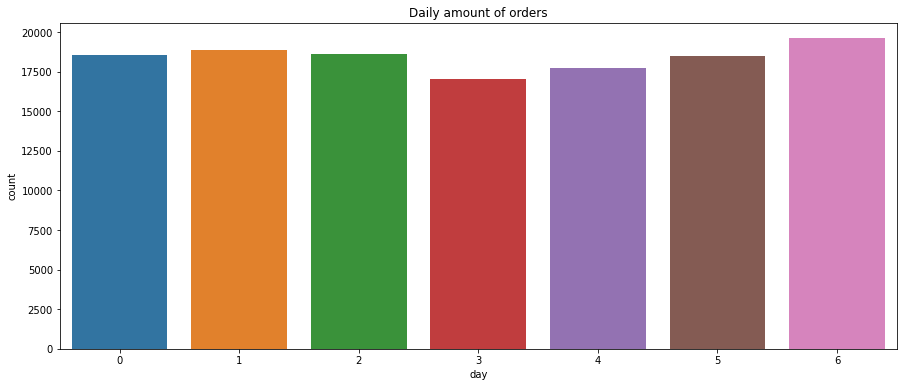

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'day',data = amazon_sale)
plt.title('Daily amount of orders');